In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('bottle.csv')

In [3]:
print(df.shape)

(864863, 74)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [35]:
print(df.describe())

              T_degC         Salnty         Depthm
count  853900.000000  817509.000000  864863.000000
mean       10.799677      33.840350     226.831951
std         4.243825       0.461843     316.050259
min         1.440000      28.431000       0.000000
25%         7.680000      33.488000      46.000000
50%        10.060000      33.863000     125.000000
75%        13.880000      34.196900     300.000000
max        31.140000      37.034000    5351.000000


          Cst_Cnt   Btl_Cnt    Depthm    T_degC    Salnty    O2ml_L    STheta  \
Cst_Cnt  1.000000  0.999345 -0.162222  0.089329 -0.198024  0.156096 -0.089902   
Btl_Cnt  0.999345  1.000000 -0.161617  0.090118 -0.195207  0.154219 -0.089521   
Depthm  -0.162222 -0.161617  1.000000 -0.681201  0.572630 -0.592399  0.582710   
T_degC   0.089329  0.090118 -0.681201  1.000000 -0.505266  0.795700 -0.829155   
Salnty  -0.198024 -0.195207  0.572630 -0.505266  1.000000 -0.823870  0.603470   
...           ...       ...       ...       ...       ...       ...       ...   
DIC2    -0.097938 -0.097251  0.572374 -0.949972  0.955942 -0.941214  0.965546   
TA1     -0.075060 -0.074255  0.786873 -0.742196  0.895124 -0.802493  0.779899   
TA2     -0.115212 -0.114165  0.866185 -0.889635  0.937147 -0.726460  0.887778   
pH2     -0.262587 -0.259082  0.223304  0.547436  0.583807  0.174204 -0.480397   
pH1      0.020778  0.020315 -0.611798  0.743735  0.106417  0.663591 -0.717815   

            O2Sat  Oxy_µmol

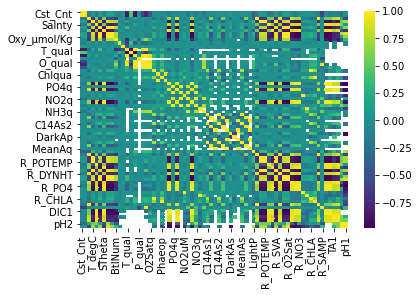

In [5]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, cmap="viridis")
plt.show()

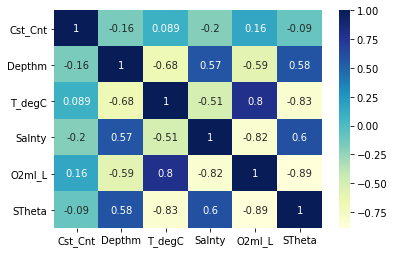

In [6]:
df1 = df[[ 'Cst_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta']]
df1.head()
cor = df1.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [7]:
df1.isnull().sum()
df1.dropna(axis=0, inplace=True)
print(df1.shape)

(661268, 6)


In [8]:
df1=df1.sample(1000)
print(df1.shape)
print(df1.describe())

(1000, 6)
            Cst_Cnt       Depthm       T_degC       Salnty       O2ml_L  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   18757.269000   219.456000    10.936003    33.832625     3.394109   
std    10446.991945   319.710019     4.259630     0.460869     2.032676   
min       92.000000     0.000000     1.500000    32.540000     0.020000   
25%    10233.750000    50.000000     7.827500    33.488750     1.437500   
50%    20047.000000   125.000000    10.000000    33.880000     3.425000   
75%    28486.000000   300.000000    14.025000    34.172500     5.452500   
max    34393.000000  3600.000000    26.240000    35.840000     8.800000   

            STheta  
count  1000.000000  
mean     25.793109  
std       1.011819  
min      22.665000  
25%      24.917000  
50%      26.000280  
75%      26.634000  
max      27.773000  


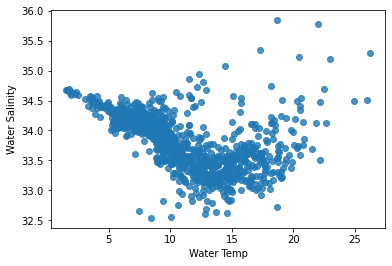

In [9]:
plt.scatter(df1['T_degC'], df1['Salnty'], alpha=0.8)
plt.xlabel('Water Temp')
plt.ylabel('Water Salinity')
plt.show()

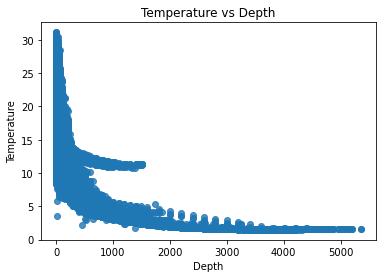

In [10]:
plt.scatter(df['Depthm'], df['T_degC'], alpha=0.8)
plt.xlabel("Depth")
plt.ylabel("Temperature")
plt.title("Temperature vs Depth")
plt.show()

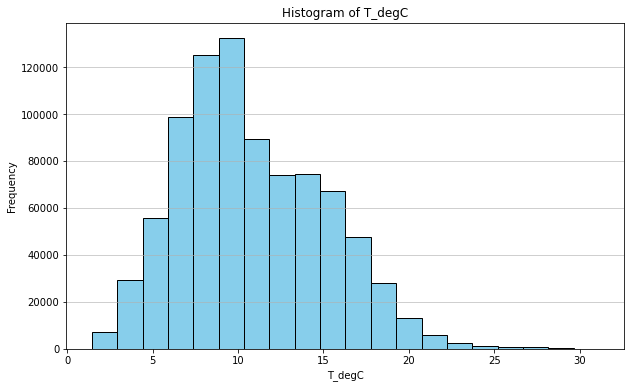

In [11]:
variable_of_interest = 'T_degC'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df[variable_of_interest], bins=20, color='skyblue', edgecolor='black')  # Customize bin count and colors
plt.title(f'Histogram of {variable_of_interest}')  # Set the title
plt.xlabel(variable_of_interest)  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.grid(axis='y', alpha=0.75)  # Add grid lines
plt.show()


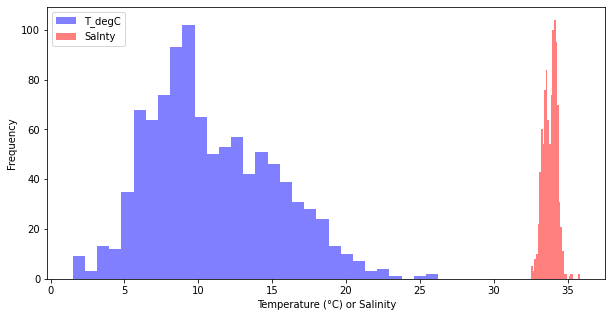

In [12]:


# Assuming you have loaded your DataFrame 'df1'

X = df1['T_degC'].values
Y = df1['Salnty'].values

# Create histograms for 'T_degC' and 'Salnty'
plt.figure(figsize=(10, 5))  # Set the figure size

# Histogram for 'T_degC'
plt.hist(X, bins=30, color='blue', alpha=0.5, label='T_degC')
# Histogram for 'Salnty'
plt.hist(Y, bins=30, color='red', alpha=0.5, label='Salnty')

# Add labels and a legend
plt.xlabel('Temperature (°C) or Salinity')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# Linear regression from scratch using Gd
# Let's assume the dataset contains two columns 'X' and 'Y', and we want to predict 'Y' based on 'X'.
# Extract features and target
#X = df['T_degC'].values
#Y = df['Salnty'].values

In [15]:
# calculation of r squared and mean sq error
target_column = "T_degC"
independent_column = "Salnty"

X = df[independent_column].values.reshape(-1, 1)
y = df[target_column].values.reshape(-1, 1)
X = df[independent_column].values.reshape(-1, 1)
y = df[target_column].values.reshape(-1, 1)
# Create a Linear Regression model
model = LinearRegression()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
# Calculate R-squared
r2 = r2_score(Y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")


R-squared: 0.36636919390784906
Mean Squared Error: 0.1349823150458944


# Multiple Linear Regression

In [18]:
# calculation of r squared and mean sq error
target_column = "Salnty"
independent_column = ['Depthm', 'T_degC']

X = df[independent_column].values.reshape(-1, 1)
y = df[target_column].values.reshape(-1, 1)
X = df[independent_column].values.reshape(-1, 1)
y = df[target_column].values.reshape(-1, 1)
# Create a Linear Regression model
model = LinearRegression()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
# Calculate R-squared
r2 = r2_score(Y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.36636919390784906
Mean Squared Error: 0.1349823150458944


In [23]:
# check shapes
print("X shape:", X.shape)
print("y shape:", Y.shape)



X shape: (1729726, 1)
y shape: (1000,)


# Sklearn Linear Regression

In [24]:
model = LinearRegression()


In [26]:
model.fit(X_train, Y_train)


LinearRegression()

In [27]:
y_pred = model.predict(X_test)


In [31]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.1349823150458944
R-squared: 0.36636919390784906


In [32]:
intercept = model.intercept_
coefficients = model.coef_
print("Intercept (b0):", intercept)
print("Coefficients (b1, b2, ...):", coefficients)


Intercept (b0): 34.36962821753569
Coefficients (b1, b2, ...): [-0.04861066]


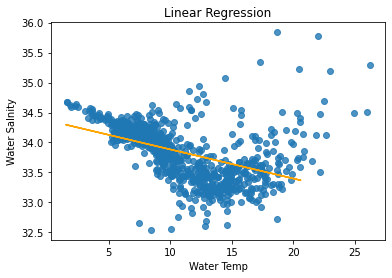

In [34]:
plt.scatter(X_train, Y_train, alpha=0.8)
plt.plot(X_test, y_pred, c='orange')
plt.xlabel('Water Temp')
plt.ylabel('Water Salnity')
plt.title('Linear Regression')
plt.show()